# Getting started

In [1]:
import pandas as pd

In [11]:
df = pd.read_csv("./data/breweries.csv")[["name", "city", "state"]]
df["loc_query"] = df["name"].str.strip() + ", " + df["city"] + ", " + df["state"]
df.head()

,name,city,state,loc_query
0,NorthGate Brewing,Minneapolis,MN,"NorthGate Brewing, Minneapolis, MN"
1,Against the Grain Brewery,Louisville,KY,"Against the Grain Brewery, Louisville, KY"
2,Jack's Abby Craft Lagers,Framingham,MA,"Jack's Abby Craft Lagers, Framingham, MA"
3,Mike Hess Brewing Company,San Diego,CA,"Mike Hess Brewing Company, San Diego, CA"
4,Fort Point Beer Company,San Francisco,CA,"Fort Point Beer Company, San Francisco, CA"


## getting city lat / long

First we need to get the latitude and longitude of the breweries. We'll use [geopy]()
to do this, which uses OpenStreetMap under the hood, but we have
to take into consideration rate limits!

In [3]:
!pip install geopy

In [4]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="jupyterlab")

For progress bar support...

In [5]:
!pip install tqdm

In [6]:
from tqdm import tqdm
tqdm.pandas()

This takes kind've a while so we're only going to do this for like 100 breweries.

In [12]:
dfsmall = df.head(100)

In [13]:
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
dfsmall['geo_loc'] = dfsmall['loc_query'].progress_apply(geocode)
dfsmall['point'] = dfsmall['geo_loc'].apply(lambda loc: tuple(loc.point) if loc else None)

100%|██████████| 100/100 [02:59<00:00,  1.78s/it]
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


# Visualize the Lat / Long!

To start off, we can just plot using matplotlib, but ideally we want
to see a map behind those points.

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

This was just a quick and dirty way to get these values out, you should probably
just pull these out of the `geo_loc` column object...

In [15]:
pointdata = dfsmall["point"].dropna()
lat, long, _ = zip(*pointdata)
pointdf = pd.DataFrame({"lat": lat, "long": long})

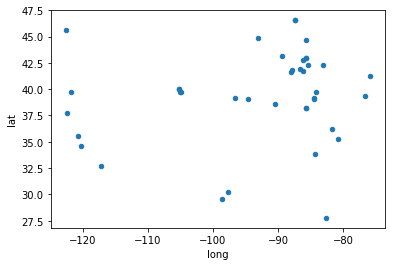

In [16]:
ax = pointdf.plot.scatter(x = "long", y = "lat")

In [17]:
!pip install mplleaflet

In [18]:
import mplleaflet

Note that mplleaflet expects a `matplotlib.figure.Figure` object.  You can get 
this from an axis like so: `ax.figure`.  All pandas `.plot` methods
return an axis. 

In [60]:
mplleaflet.display(ax.figure)

This is really just the start of what you might want to do with plotting.  
`mplleaflet` is nice because it lets you turn any matplotlib plot into 
an interactive map.  There are also many other resources to check out!

# Other good resources to look at

* [geopandas](http://geopandas.org/)
* folium
    * [documentation](https://python-visualization.github.io/folium/)
    * [examples](http://python-visualization.github.io/folium/quickstart.html)
    * [getting started blog post](https://alysivji.github.io/getting-started-with-folium.html)

In [22]:
pointdf.to_csv("data/beer-loc-small.csv")